# Data Preprocessing
Subject Code: 18AIL66

Program No.: 3

_Demonstrates Pre processing (Data Cleaning, Integration and Transformation) activity
on suitable data_

In [1]:
# imports libraries

from pathlib import Path
import pandas as pd
import tarfile
import urllib # ***Ensure to import this library when running in Anaconda***
# import urllib.request

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

import pickle

In [2]:
# Checks the present working directory

!pwd

/home/pradip/Development/Teaching/Machine_Learning_Laboratory_Course_18AIL66/Program_#3


## Having a Quick Look into the Data

In [3]:
# Loads data into Dataframe

data_path = "https://github.com/PradipKumarDas/Teaching/raw/master/Data/housing/housing.csv"
housing = pd.read_csv(data_path)

In [4]:
# Having a quick look at the data

housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
# Looking at the basic information such as about the data

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
# Looking at the statistics for the non-numeric values

housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
# Looking a the basic statistics about the data

housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
# Checks for duplicate observations

print("There are", sum(housing.duplicated()), "duplicates in the datsset")

There are 0 duplicates in the datsset


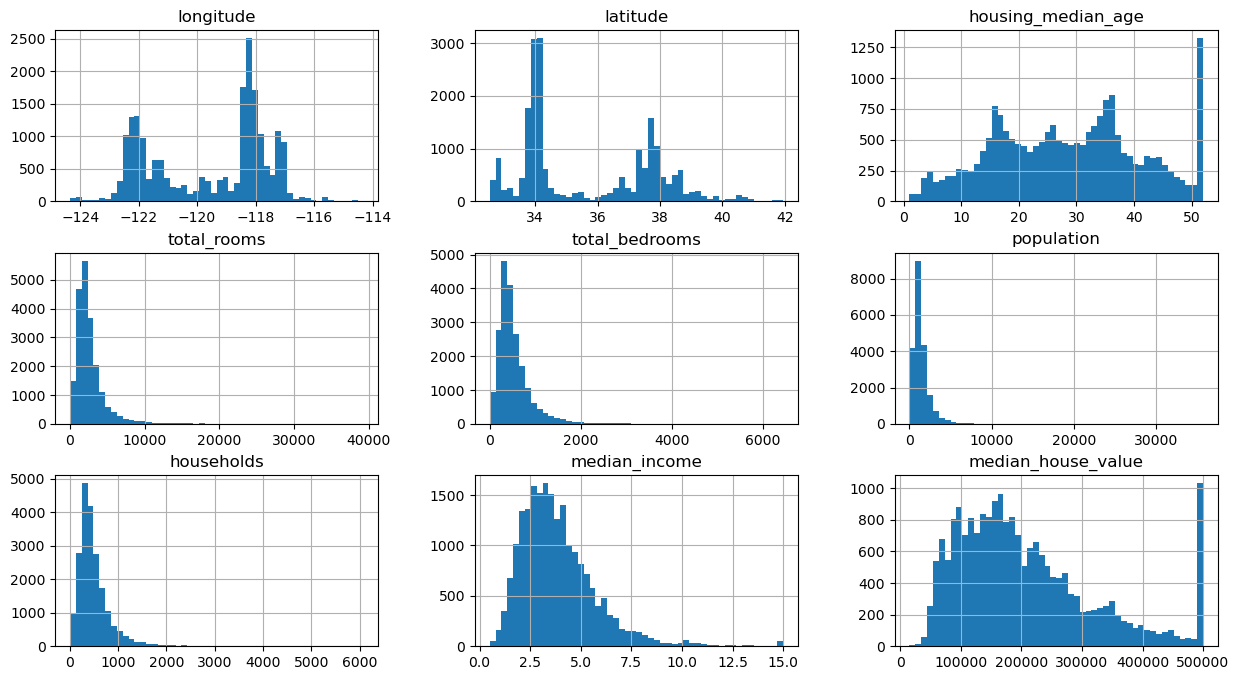

In [9]:
# Looking at the data distributions

housing.hist(bins=50, figsize=(15,8))
plt.show()

**Observations from the information, statistics and histograms:**

1) There are null values against attribute 'total_bedrooms'.
2) 'median_income' is in different scale.
3) 'house_median_age', 'median_income' and 'median_house_value' is capped to 50, 15 and 500000, respectively.
4) Attributes, in general, are in different scales.
5) Histograms are tail-heavy

## Creating Test Set

There are two options to create test set.
- Using random sampling method to select observerations
- Using stratified sampling method to ensure both train and test set have same distribution

Let's go witht the second option

In [10]:
# Option 1
# train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

# Option 2
housing["median_income_cat"] = pd.cut(
    housing["median_income"],
    bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
    labels=[1, 2, 3, 4, 5])

<AxesSubplot:>

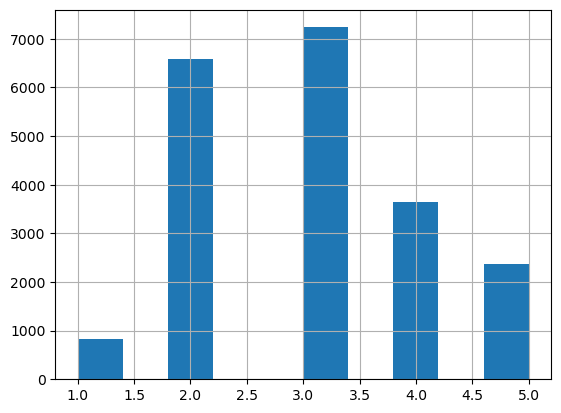

In [11]:
# Viewing distribution of median income categories

housing["median_income_cat"].hist()

In [12]:
# Splits data into train and test dataset applying stratification

stratified_train_set, stratified_test_set = train_test_split(
    housing, test_size=0.2, stratify=housing["median_income_cat"], random_state=42)

In [13]:
# The same stratified splitting could also be done using the following
# relative complex steps

"""

stratifiedShuffleSplitter = StratifiedShuffleSplit(
    n_splits=1,
    test_size=0.2,
    random_state=42)

for train_idx, test_idx in stratifiedShuffleSplitter.split(
    housing, housing["median_income_cat"]):
    stratified_train_set = housing.iloc[train_idx]
    stratified_test_set = housing.iloc[test_idx]

"""

'\n\nstratifiedShuffleSplitter = StratifiedShuffleSplit(\n    n_splits=1,\n    test_size=0.2,\n    random_state=42)\n\nfor train_idx, test_idx in stratifiedShuffleSplitter.split(\n    housing, housing["median_income_cat"]):\n    stratified_train_set = housing.iloc[train_idx]\n    stratified_test_set = housing.iloc[test_idx]\n\n'

In [14]:
# Checks if both train and test dataset have the same distribution
# on the median income category

print("Median income category distribution in training data")
print(stratified_train_set["median_income_cat"].value_counts()/len(stratified_train_set))
print()
print("Median income category distribution in test data")
print(stratified_test_set["median_income_cat"].value_counts()/len(stratified_test_set))

Median income category distribution in training data
3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: median_income_cat, dtype: float64

Median income category distribution in test data
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: median_income_cat, dtype: float64


In [15]:
# Removes intermediate attribute 'median_income_cat' after stratification

stratified_train_set.drop("median_income_cat", axis=1, inplace=True)
stratified_test_set.drop("median_income_cat", axis=1, inplace=True)

In [16]:
# Before further exploration and data manipulations in the following
# sections, let's have a copy of the training set and keeping test data aside

housing = stratified_train_set.copy()

## Exploratory Data Analysis (EDA)

In [17]:
# Let's now look at the geographic data visually

housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,458300.0,NEAR BAY
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,483800.0,<1H OCEAN
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,101700.0,INLAND
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,96100.0,INLAND
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,361800.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105,500001.0,<1H OCEAN
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733,88800.0,INLAND
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616,148800.0,NEAR OCEAN
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455,500001.0,<1H OCEAN


### Visualizing Geographic Data

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

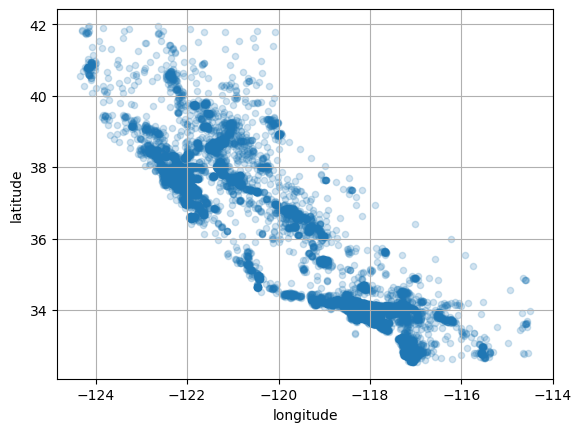

In [18]:
# Visualizing high-density areas

housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

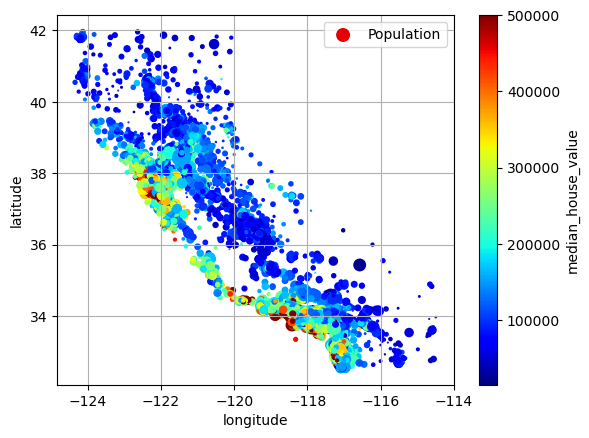

In [19]:
# Now, visualize geographic area to look for both high-density and expensive areas

housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
            s=housing["population"]/100, label="Population",
            c="median_house_value", cmap="jet", colorbar=True,
            legend=True, sharex=False)

### Looking for Correlations

In [20]:
# Looks for correlations (amongst numerical data)

housing.corr()["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

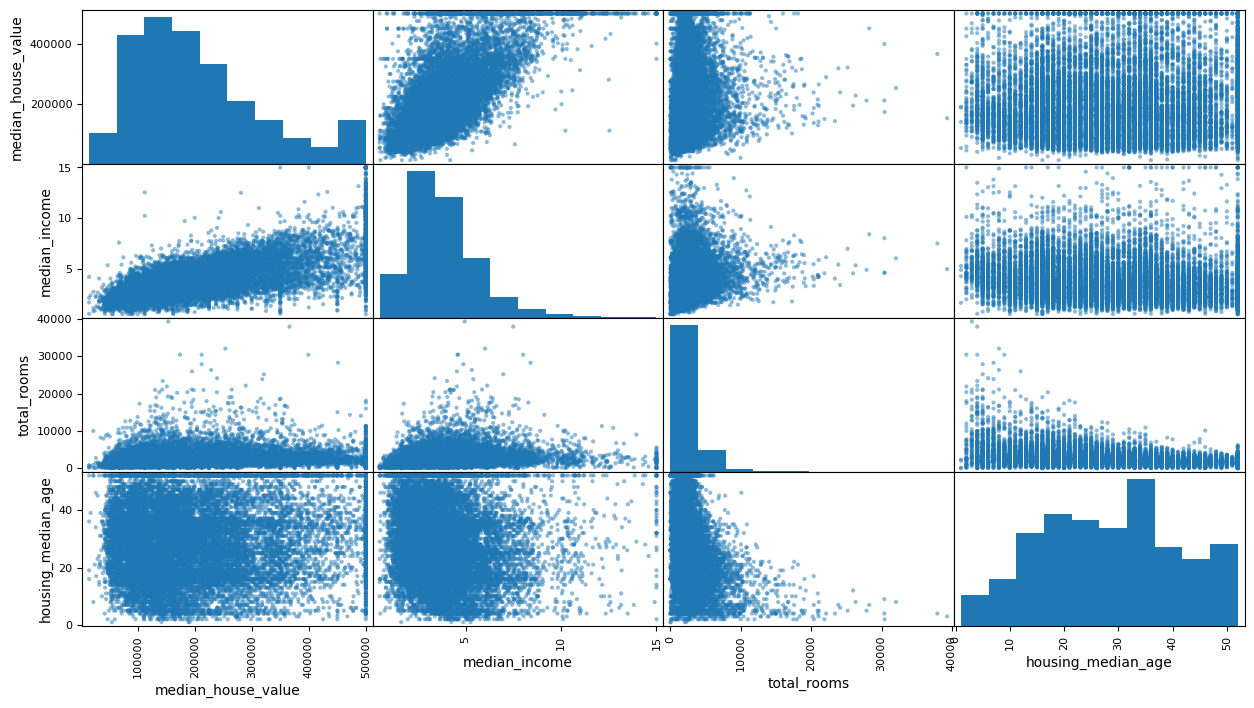

In [21]:
# Viewing correlations amonst top four attributes graphically

scatter_matrix(
    housing[["median_house_value", "median_income", "total_rooms", "housing_median_age"]],
    figsize=(15, 8))

### Experimenting with Attribute Combinations

In [22]:
# Experimenting with computed attribute

housing["rooms_per_house"] = housing["total_rooms"]/housing["households"]

housing["bedrooms_ratio"] = housing["total_bedrooms"]/housing["total_rooms"]

housing["people_per_house"] = housing["population"]/housing["households"]

In [23]:
# Let's now check the correlations with new attributes

housing.corr()["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
rooms_per_house       0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
longitude            -0.050859
latitude             -0.139584
bedrooms_ratio       -0.256397
Name: median_house_value, dtype: float64

The above correlations with 'median_house_value' has the following observations.
- New attribute 'bedrooms_ratio' is more correlated (negatively) with 'median_house_value' than 'total_rooms' or 'total_bedrooms'
- 'rooms_per_house' is more correlated with 'median_house_value' than 'total_rooms'

In [24]:
# Showing head of DataFrame with new attributes

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_house,bedrooms_ratio,people_per_house
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,458300.0,NEAR BAY,3.211799,0.335742,1.524178
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,483800.0,<1H OCEAN,5.504202,0.180153,1.865546
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,101700.0,INLAND,5.334975,0.200369,2.768473
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,96100.0,INLAND,5.351282,0.203881,2.365385
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,361800.0,NEAR OCEAN,3.725256,0.277371,1.631399


## Preparing Data

### Cleaning Data

In [25]:
# Seperates labels from features

housing = stratified_train_set.drop("median_house_value", axis=1)
housing_labels = stratified_train_set["median_house_value"].copy()

**Handling missing values in attribute 'total_bedrooms'**

The options are to deal with missing values:
- Removing observations with null values in the attribute
```
housing.dropna(subset=["total_bedrooms"], inplace=True)
```
- Removing the whole attribute
```
housing.drop("total_bedrooms", axis=1)
```
- Setting appropriate values (e.g. mean, median or zero) agains the null values
```
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace=True)
```

Let's go with the third option

In [26]:
# Imputes missing attributes in train dataset

# Instantiates imputer
imputer = SimpleImputer(strategy="median")

# Considers only numeric columns as the imputer works on numeric data
housing_num = housing.drop("ocean_proximity", axis=1)

# Fits the imputer
imputer.fit(housing_num)

# Transforms the missing values in each column with learned median
X = imputer.transform(housing_num)

# Creates a DataFrame out of transformed dataset
housing_num_tr = pd.DataFrame(X, index=housing_num.index, columns=housing_num.columns)

**Encoding categorical data in attribute 'ocean_proximity'**

Options are

1) Ordinal encoding
2) Binary encoding

Let's go with the second option

In [27]:
# Encodes categorical attribute

cat_encoder = OneHotEncoder(sparse=False)
housing_cat = housing[["ocean_proximity"]]

cat_encoder.fit(housing_cat)
housing_cat_1hot = cat_encoder.transform(housing_cat)
# housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [28]:
# Shows one-hot encoded information in densed array form

housing_cat_1hot

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [29]:
# Shows the ordered list of categories related to one-hot encoding

cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### Scaling Features

As machine learning algorithms don't work well with (numerical) attributes having different scales, so let's apply scaling transformations to relevant attributes.

The options are
- Min-max scaling (also known as normalization)
- Standardization

Let's go with the second option

In [30]:
std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_num_tr)

In [31]:
print("Shape of the transformed dataset with only numerical attributes is", 
      housing_num.shape)

Shape of the transformed dataset with only numerical attributes is (16512, 8)


Now, instead of transforming numeric and non-numeric attributes idividually and then integrating back, transformation pipelines that can take care of tranforming both these different types of attributes in an integrated way can be used as shown below.

### Creating Transformation Pipelines

In [32]:
# Seting data transformation pipeline for numerical attributes

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("std_scaler", StandardScaler())])

#housing_num_tr = num_pipeline.fit_transform(housing_num)

In [33]:
# Another way to perform transformations to both numerical and categorical attritues
# is by using ColumnTransformer. This transformer can also have sub-pipeline such
# as defined by 'num_pipeline' and shown below.

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)])

housing_prepared = full_pipeline.fit_transform(housing)

In [34]:
print("Shape of the transformed dataset is", housing_prepared.shape)

Shape of the transformed dataset is (16512, 13)


### Transforming Test Data Through Pipleline

In [35]:
# Seperating test labels from test dataset before transformations

# Storing labels in a seperate series
housing_test_labels = stratified_test_set["median_house_value"].copy()

# And, then dropping the labels from the test dataset
stratified_test_set.drop("median_house_value", axis=1, inplace=True)

In [36]:
# Now, transforming the test dataset through pipeline
X_test = full_pipeline.transform(stratified_test_set)

In [37]:
# Creating a DataFrame out of transformed test dataset
housing_test_prepared_df = pd.DataFrame(
    X_test, 
    index=stratified_test_set.index, 
    columns=num_attribs+list(full_pipeline.named_transformers_["cat"].categories_[0]))

In [38]:
# Let's check how the transformed test dataset looks like
housing_test_prepared_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
3905,-1.188103,0.690153,-0.602061,-0.115504,-0.428813,-0.468151,-0.415276,2.043245,1.0,0.0,0.0,0.0,0.0
16821,0.781342,-0.819296,0.589800,-0.480685,-0.646916,-0.567716,-0.595501,0.404345,1.0,0.0,0.0,0.0,0.0
2900,0.696366,-0.889612,0.113056,1.498977,2.873552,0.648987,2.619822,0.119655,0.0,0.0,0.0,0.0,1.0
7193,-1.453028,0.985480,1.861119,-0.216638,-0.272347,-0.322914,-0.339529,0.137732,0.0,0.0,0.0,0.0,1.0
13928,-1.408041,1.004230,-1.873380,-0.564887,-0.054244,-0.639878,-0.282066,-0.140986,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12369,-2.292791,2.415237,1.384374,0.184236,0.140152,-0.200513,0.107116,-0.928669,0.0,0.0,0.0,0.0,1.0
8707,0.281483,-0.116137,0.033598,-0.374975,-0.187003,-0.266281,-0.211543,-1.079101,0.0,1.0,0.0,0.0,0.0
16634,-1.717953,1.421438,0.351428,-0.789578,-0.926657,-0.942226,-0.961176,0.431884,1.0,0.0,0.0,0.0,0.0
9779,-1.228091,0.919851,-0.363689,-0.257367,-0.367175,0.057077,-0.289902,0.370886,0.0,0.0,0.0,1.0,0.0


Once these train and test datasets are transformed and prepared through pipeline (or manually for that matter), then appropriate machine learning model(s) can be trained over the train dataset and tested against train dataset in the subsequent steps.